In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG', 'AAPL', 'MSFT', 'FB']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [6]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

Amazon Launches Luna, a Cloud-Based Video Game Service
Sep-24-20 10:56PM  
Amazon Joins Fellow Tech Giants In The 'Game Wars' With 'Luna' Launch
09:35PM  
Amazon's Fire TV Gets a Makeover to Better Compete With Roku
08:58PM  
Amazon Chases Google, Microsoft in the Game-Streaming Market
07:40PM  


In [3]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMZN',
  'Sep-24-20',
  '10:56PM',
  'Amazon Launches Luna, a Cloud-Based Video Game Service'],
 ['AMZN',
  'Sep-24-20',
  '09:35PM',
  "Amazon Joins Fellow Tech Giants In The 'Game Wars' With 'Luna' Launch"],
 ['AMZN',
  'Sep-24-20',
  '08:58PM',
  "Amazon's Fire TV Gets a Makeover to Better Compete With Roku"],
 ['AMZN',
  'Sep-24-20',
  '07:40PM',
  'Amazon Chases Google, Microsoft in the Game-Streaming Market'],
 ['AMZN',
  'Sep-24-20',
  '06:48PM',
  'Apple Buys Startup That Creates Radio-Like Stations for Podcasts'],
 ['AMZN',
  'Sep-24-20',
  '06:16PM',
  'Deliveroo, Backed by Amazon, Could Launch a 2021 IPO'],
 ['AMZN',
  'Sep-24-20',
  '05:35PM',
  "'The biggest risk is uncertainty': AllianceBernstein's Valerie Grant on headwinds facing the market ahead of the election"],
 ['AMZN',
  'Sep-24-20',
  '05:30PM',
  'Dow Jones Futures: Amid Whipsaw Stock Market Action, Tesla, Nvidia, These Tech Titans Hold Key Support'],
 ['AMZN',
  'Sep-24-20',
  '05:21PM',
  "Microsoft's Xbox 

In [4]:
#mycol.insert_one({"name":"News","data":parsed_news}) # inesrt into DB
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head(20)

,ticker,date,time,headline,neg,neu,pos,compound
0,AMZN,2020-09-24,10:56PM,"Amazon Launches Luna, a Cloud-Based Video Game...",0.000,0.779,0.221,0.1779
1,AMZN,2020-09-24,09:35PM,Amazon Joins Fellow Tech Giants In The 'Game W...,0.235,0.654,0.111,-0.4404
2,AMZN,2020-09-24,08:58PM,Amazon's Fire TV Gets a Makeover to Better Com...,0.180,0.602,0.218,0.1280
3,AMZN,2020-09-24,07:40PM,"Amazon Chases Google, Microsoft in the Game-St...",0.000,0.805,0.195,0.1779
4,AMZN,2020-09-24,06:48PM,Apple Buys Startup That Creates Radio-Like Sta...,0.000,0.792,0.208,0.2732
5,AMZN,2020-09-24,06:16PM,"Deliveroo, Backed by Amazon, Could Launch a 20...",0.000,0.682,0.318,0.2023
6,AMZN,2020-09-24,05:35PM,'The biggest risk is uncertainty': AllianceBer...,0.107,0.765,0.128,0.1027
7,AMZN,2020-09-24,05:30PM,Dow Jones Futures: Amid Whipsaw Stock Market A...,0.000,0.847,0.153,0.4019
8,AMZN,2020-09-24,05:21PM,Microsoft's Xbox boss: Video games undergoing ...,0.000,1.000,0.000,0.0000
9,AMZN,2020-09-24,05:17PM,"Amazon Unveils New Echo Lineup, Game Streaming...",0.000,0.825,0.175,0.1779


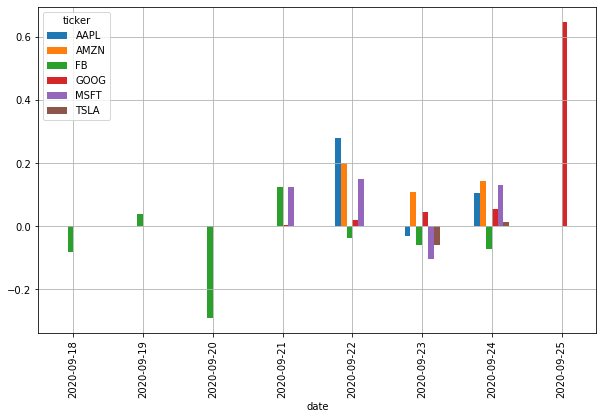

In [5]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()